## Importing Libraries and viewing DataFrame

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [40]:
df = pd.read_csv('SyriaTel_customer_data.csv')
print('Df shape is:',df.shape)
df.head()

Df shape is: (3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [26]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

### Who are our customers?

In [248]:
total_charge_per_day = df['total day charge'] + df['total eve charge'] + df['total night charge']
pd.concat([total_charge_per_day,df['churn']],axis=1)
total_charge_per_day.describe()

count    3333.000000
mean       56.685173
std        10.487816
min        19.980000
25%        49.590000
50%        56.630000
75%        63.650000
max        92.560000
dtype: float64

We do business in all 51 States, these are the 5 states with the __most customers__

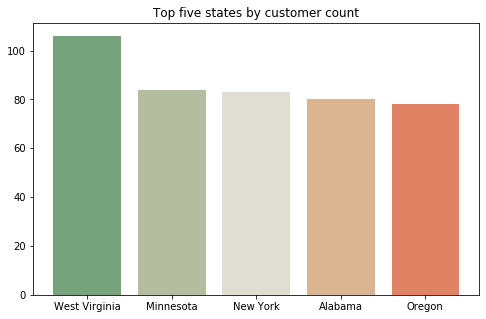

In [256]:
plt.figure(figsize=(8,5));
plt.title('Top five states by customer count');
tp_fv_st = df['state'].value_counts()[:5]
states = ['West Virginia', 'Minnesota', 'New York', 'Alabama', 'Oregon']
colors1 = ['#76a27c', '#b5bda0', '#e0ddd3', '#dbb591', '#df8364']
plt.bar(states,tp_fv_st,color=colors1);
plt.savefig('graphs_and_images/top_five_states_by_customer.png')

I've added the day, evening, and night calls to get the total amount of calls. Pictured here is the top five states by calls

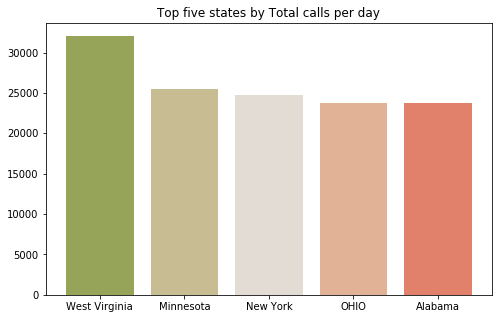

In [138]:
total_call_per_day = df['total day calls'] + df['total eve calls'] + df['total night calls']
tp_fv_calls = pd.concat([df['state'],total_call_per_day],axis=1).groupby('state')[0].sum().sort_values(ascending=False)[:5]
plt.figure(figsize=(8,5));
plt.title('Top five states by Total calls per day');
colors2 = ['#96a45a', '#c8bc93', '#e3dcd4', '#e1b295', '#e2816b']
states = ['West Virginia', 'Minnesota', 'New York', 'OHIO', 'Alabama']
plt.bar(states,tp_fv_calls,color=colors2);
plt.show()

The states with the most customers who leave us are:

In [176]:
pd.DataFrame(df.groupby('state')['churn'].sum().sort_values(ascending=False)[:5]).reset_index()

,state,churn
0,TX,18.0
1,NJ,18.0
2,MD,17.0
3,MI,16.0
4,NY,15.0


The average churn rate is: 14.49 percent
These are the five states with the highest churn rate


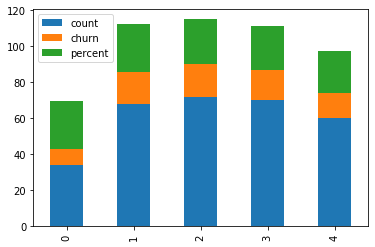

In [242]:
state_count = df['state'].value_counts().reset_index().rename(columns={'index':'state','state':'count'})
state_churn = df.groupby('state')['churn'].sum().reset_index()
states_ct_ch = pd.merge(state_count,state_churn,how='left')
states_ct_ch['percent'] =  round((states_ct_ch['churn'] / states_ct_ch['count']) *100,2)
print('The average churn rate is:',round(states_ct_ch['percent'].mean(),2),'percent')
print('These are the five states with the highest churn rate')
states_ct_ch.sort_values(by='percent',ascending=False).reset_index(drop=True)[:5].plot.bar(stacked=True)
# states_ct_ch.sort_values(by='percent',ascending=True).reset_index(drop=True)[:5]

In [174]:
avg_churn_st = df.groupby('state')[['churn',].sum().mean()
# print('On average each state has {} '.format(round(avg_churn_st,2)))

On average each state has 9.47 customers who churn


We can see that in our dataset ~15% of customers leave to do business elsewhere

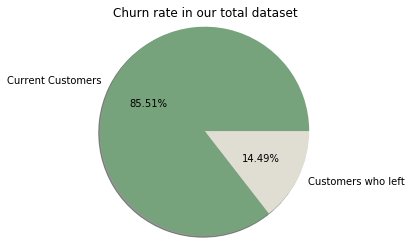

In [91]:
# plt.figure(figsize=(6.5,6.5));
plt.title('Churn rate in our total dataset');
plt.pie(df['churn'].value_counts(normalize=True),
        colors=['#76a27c','#e0ddd3'],
        labels=['Current Customers','Customers who left'],
        shadow=True,
        autopct='%1.2f%%',
        radius = 1.2);
plt.show()